In [1]:

# 8. Using Seaborn and Matplotlib, plot the histograms of logarithm of ‘Confirmed’, ‘Deaths’, and ‘Recovered’ columns. 

# 	Follow the following steps:
# I.	for each of the columns, make sure that you exclude data with zero value. The reason we exclude zero values is that when
#     you take the logarithm of zero the result is undefined.
# II.	Take the logarithm of the column data with the zero values excluded.
# III.	Plot the histogram

# Your plot should look like the following with the legends and x-axis label exactly as shown.


# 9. Plot the KDE plot of the logarithms of the columns ‘Confirmed’, ‘Deaths’, and ‘Recovered’ columns as follows.

	
# The title and x-axis label should be as shown in the figure above.

# 	What insights can you draw from the above KDE plot?




In [2]:
# 1. Read the provided csv file (covid19.csv) into your Colab environment as a Pandas DataFrame.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('covid19.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,51526,2191,41727,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017.0,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,NaN,NaN,Unknown,China,2021-01-02 05:22:33,NaN,NaN,0,0,0,0.0,"Unknown, China",0.000000,0.000000
3980,NaN,NaN,NaN,Kiribati,2021-01-02 05:22:33,-3.37040,-168.734000,0,0,0,0.0,Kiribati,0.000000,0.000000
3981,NaN,NaN,NaN,Palau,2021-01-02 05:22:33,7.51500,134.582500,0,0,0,0.0,Palau,0.000000,0.000000
3982,NaN,NaN,Cook Islands,New Zealand,2021-01-02 05:22:33,-21.23670,-159.777700,0,0,0,0.0,"Cook Islands, New Zealand",0.000000,0.000000


In [4]:
# 2. Show the top 5 rows of the dataframe.

In [5]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,51526,2191,41727,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017.0,Angola,53.452981,2.305328


In [6]:
# 3.Show the summary statistic of the data.
# The summary statistic should look like the following.

In [7]:
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3265.000000,3897.000000,3897.000000,3.984000e+03,3984.000000,3.984000e+03,3.983000e+03,3895.000000,3940.000000
mean,32386.688208,35.973564,-72.005376,2.110788e+04,474.467620,1.187575e+04,8.748282e+03,5770.649567,1.939365
std,18017.294540,13.043953,53.751137,1.057523e+05,2729.271632,8.221851e+04,6.180559e+04,3208.655754,5.493363
min,66.000000,-52.368000,-174.159600,0.000000e+00,0.000000,0.000000e+00,-1.083768e+06,0.000000,0.000000
25%,19049.000000,33.268798,-96.616867,7.000000e+02,9.000000,0.000000e+00,5.910000e+02,3599.272506,0.969272
50%,30067.000000,37.946365,-86.854759,1.964000e+03,32.000000,0.000000e+00,1.663000e+03,5851.131858,1.540464
75%,47039.000000,42.220792,-77.492245,7.721750e+03,114.000000,0.000000e+00,4.926000e+03,7762.999138,2.310092
max,99999.000000,71.706900,178.065000,2.636045e+06,64731.000000,2.114760e+06,2.400750e+06,27388.219766,271.875000


In [8]:
# 4. Show the info of the data. The result should look like the following.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3811 non-null   object 
 3   Country_Region       3984 non-null   object 
 4   Last_Update          3984 non-null   object 
 5   Lat                  3897 non-null   float64
 6   Long_                3897 non-null   float64
 7   Confirmed            3984 non-null   int64  
 8   Deaths               3984 non-null   int64  
 9   Recovered            3984 non-null   int64  
 10  Active               3983 non-null   float64
 11  Combined_Key         3984 non-null   object 
 12  Incident_Rate        3895 non-null   float64
 13  Case_Fatality_Ratio  3940 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 435.9+ KB


In [10]:
# 5. Show the number of null values in each column as follows.

In [11]:
df.isna().sum()

FIPS                   719
Admin2                 714
Province_State         173
Country_Region           0
Last_Update              0
Lat                     87
Long_                   87
Confirmed                0
Deaths                   0
Recovered                0
Active                   1
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     44
dtype: int64

In [12]:
# 6. We see that there is one null value on ‘Active’ column. Show the row that contains the null value in the ‘Active’ column as
# follows.

In [13]:
df[df['Active'].isna()]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
78,NaN,NaN,Diamond Princess,Canada,2020-12-21 13:27:30,NaN,NaN,0,1,0,NaN,"Diamond Princess, Canada",NaN,NaN


In [14]:
# 7. Fill the null value on the ‘Active’ column with zero. And then verify that the null value on ‘Active’ has been filled 
# with a zero.

In [15]:
df.Active.fillna(0, inplace = True)
df.Active.isna().sum()

0

In [16]:
# 8. Using Seaborn and Matplotlib, plot the histograms of logarithm of ‘Confirmed’, ‘Deaths’, and ‘Recovered’ columns. 

# Follow the following steps:
# I. for each of the columns, make sure that you exclude data with zero value. The reason we exclude zero values is that when
#     you take the logarithm of zero the result is undefined.
# II. Take the logarithm of the column data with the zero values excluded.
# III. Plot the histogram

# Your plot should look like the following with the legends and x-axis label exactly as shown.

In [17]:
# ?plt.hist

''

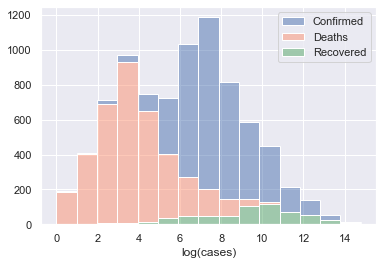

In [18]:
df1 = (df[~(df[['Confirmed','Deaths', 'Recovered']] == 0)])[['Confirmed', 'Deaths', 'Recovered']]
# df1

sns.set()
plt.style.use('_classic_test_patch')
sns.histplot(data =np.log(df1), bins = 15, multiple = 'stack', kde=False, edgecolor='white',palette = ['#4C72B0', '#fc9272', '#55A868'], alpha = 0.5)
plt.xlabel('log(cases)')
plt.ylabel('')
# df_histplot.set_xticks(range(15))
# # ticks, label = plt.xticks()
# # new = [tick+1 for tick in ticks]
# # plt.xticks(new)
;


In [19]:
# Colours can be provided as a list to the matplotlib.pyplot.bar function under the attribute
# ‘color’.: matplotlib.pyplot.bar(x, y, color = [‘red’, ‘blue’, ‘green’])
# [Note: if there are more than three bars, the colours will start repeating themselves.]

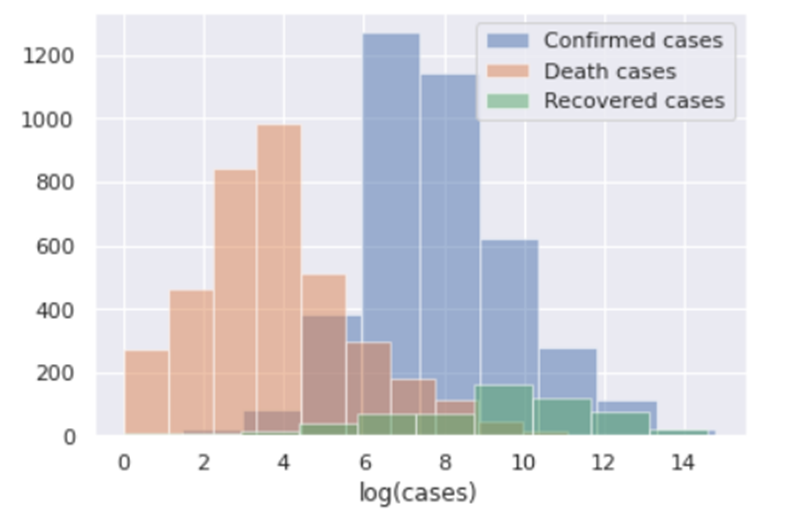

In [20]:
# 9. Plot the KDE plot of the logarithms of the columns ‘Confirmed’, ‘Deaths’, and ‘Recovered’ columns as follows

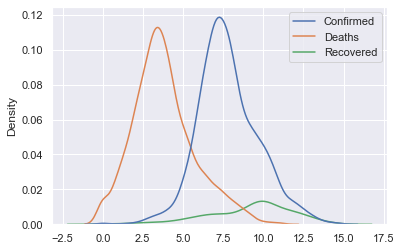

In [21]:
sns.kdeplot(data = np.log(df1));

In [22]:
# here there are normal distributions of both the confirmed and deaths cases because of the bell shaped curve we know it
# the probaility of 3 deaths occurring is 0.11
# the probability of 8 confirmed cases are encountered is 0.12
# the probability of 10 deaths encountered is 0.18

In [23]:
# 10.  Show the top 10 countries ranked by Confirmed cases exactly as shown below.

In [24]:
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,51526,2191,41727,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017.0,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,NaN,NaN,Unknown,China,2021-01-02 05:22:33,NaN,NaN,0,0,0,0.0,"Unknown, China",0.000000,0.000000
3980,NaN,NaN,NaN,Kiribati,2021-01-02 05:22:33,-3.37040,-168.734000,0,0,0,0.0,Kiribati,0.000000,0.000000
3981,NaN,NaN,NaN,Palau,2021-01-02 05:22:33,7.51500,134.582500,0,0,0,0.0,Palau,0.000000,0.000000
3982,NaN,NaN,Cook Islands,New Zealand,2021-01-02 05:22:33,-21.23670,-159.777700,0,0,0,0.0,"Cook Islands, New Zealand",0.000000,0.000000


In [25]:
df_groupedby_country = df.groupby('Country_Region')[['Confirmed','Deaths','Recovered']].sum().reset_index()\
.sort_values(['Confirmed'], ascending=False).head(10).set_index(pd.Index(range(10)))
df_groupedby_country

,Country_Region,Confirmed,Deaths,Recovered
0,US,20254160,354366,0
1,India,10286709,148994,9883461
2,Brazil,7700578,195411,6855372
3,Russia,3153960,56798,2553467
4,France,2697014,64892,200822
5,United Kingdom,2549693,74237,5682
6,Turkey,2220855,21093,2114760
7,Italy,2129376,74621,1479988
8,Spain,1928265,50837,150376
9,Germany,1762637,34145,1388744


In [26]:
# 11. Remove the rows with ‘Confirmed’ and ‘Deaths’ equal to zero from the above ranked DataFrame in step 10.

In [27]:
a = df.groupby('Country_Region')[['Confirmed','Deaths','Recovered']].sum().reset_index().sort_values(['Confirmed'],\
                                                                                                     ascending=False)
a

,Country_Region,Confirmed,Deaths,Recovered
180,US,20254160,354366,0
79,India,10286709,148994,9883461
23,Brazil,7700578,195411,6855372
143,Russia,3153960,56798,2553467
62,France,2697014,64892,200822
...,...,...,...,...
148,Samoa,2,0,2
187,Vanuatu,1,0,1
166,Summer Olympics 2020,0,0,0
91,Kiribati,0,0,0


In [28]:
#  Show the 5 countries with the least non-zero Confirmed cases as shown below.

In [29]:
a[(a['Confirmed'] == 0) & (a['Deaths'] == 0)]

,Country_Region,Confirmed,Deaths,Recovered
166,Summer Olympics 2020,0,0,0
91,Kiribati,0,0,0
133,Palau,0,0,0


In [30]:
b = a[(a['Confirmed'] != 0) & (a['Deaths'] != 0)].sort_values(by=['Confirmed'], ascending=False).tail()\
.set_index(pd.Index([174, 176, 177, 181, 187]))
b

,Country_Region,Confirmed,Deaths,Recovered
174,Saint Lucia,353,5,289
176,Antigua and Barbuda,159,5,148
177,Brunei,157,3,149
181,Fiji,49,2,44
187,MS Zaandam,9,2,7


In [31]:
# 12. Add a new column named “Fatality Percentage” in the DataFrame from Step 11.

# Fatality Percentage = (Deaths / Confirmed) * 100 

In [32]:
a

,Country_Region,Confirmed,Deaths,Recovered
180,US,20254160,354366,0
79,India,10286709,148994,9883461
23,Brazil,7700578,195411,6855372
143,Russia,3153960,56798,2553467
62,France,2697014,64892,200822
...,...,...,...,...
148,Samoa,2,0,2
187,Vanuatu,1,0,1
166,Summer Olympics 2020,0,0,0
91,Kiribati,0,0,0


In [33]:
a['Fatality Percentage'] = (a.Deaths/a.Confirmed)*100

In [34]:
a

,Country_Region,Confirmed,Deaths,Recovered,Fatality Percentage
180,US,20254160,354366,0,1.749596
79,India,10286709,148994,9883461,1.448413
23,Brazil,7700578,195411,6855372,2.537615
143,Russia,3153960,56798,2553467,1.800847
62,France,2697014,64892,200822,2.406068
...,...,...,...,...,...
148,Samoa,2,0,2,0.000000
187,Vanuatu,1,0,1,0.000000
166,Summer Olympics 2020,0,0,0,NaN
91,Kiribati,0,0,0,NaN


In [35]:
b = a.sort_values(['Fatality Percentage'], ascending = False)[b['Confirmed'] > 2000000]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
b.set_index(['7','5','2','4','3','0','1','6'])

In [36]:
# 13.  Rank the US states by their Confirmed cases, and show the top 10 states with the most confirmed cases.

In [37]:
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,51526,2191,41727,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017.0,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,NaN,NaN,Unknown,China,2021-01-02 05:22:33,NaN,NaN,0,0,0,0.0,"Unknown, China",0.000000,0.000000
3980,NaN,NaN,NaN,Kiribati,2021-01-02 05:22:33,-3.37040,-168.734000,0,0,0,0.0,Kiribati,0.000000,0.000000
3981,NaN,NaN,NaN,Palau,2021-01-02 05:22:33,7.51500,134.582500,0,0,0,0.0,Palau,0.000000,0.000000
3982,NaN,NaN,Cook Islands,New Zealand,2021-01-02 05:22:33,-21.23670,-159.777700,0,0,0,0.0,"Cook Islands, New Zealand",0.000000,0.000000


In [38]:
df[df['Country_Region']=='US'][['Province_State','Confirmed', 'Deaths']].sort_values(['Confirmed'], ascending=True)\
.groupby('Province_State').sum().reset_index().sort_values(['Confirmed'], ascending = False).head(10).\
set_index(pd.Index(range(10)))

,Province_State,Confirmed,Deaths
0,California,2365024,26424
1,Texas,1782956,28359
2,Florida,1323315,21673
3,New York,995816,38155
4,Illinois,963389,17978
5,Ohio,700380,13746
6,Georgia,677589,10958
7,Pennsylvania,653260,16245
8,Tennessee,586802,6907
9,North Carolina,539545,6748


In [39]:
# 14. Rank the countries by their death counts and show the top 5 countries as shown below.

In [40]:
a

,Country_Region,Confirmed,Deaths,Recovered,Fatality Percentage
180,US,20254160,354366,0,1.749596
79,India,10286709,148994,9883461,1.448413
23,Brazil,7700578,195411,6855372,2.537615
143,Russia,3153960,56798,2553467,1.800847
62,France,2697014,64892,200822,2.406068
...,...,...,...,...,...
148,Samoa,2,0,2,0.000000
187,Vanuatu,1,0,1,0.000000
166,Summer Olympics 2020,0,0,0,NaN
91,Kiribati,0,0,0,NaN


In [41]:
c = a[['Country_Region', 'Deaths']].sort_values(['Deaths'], ascending=False).head().set_index(pd.Index(range(5)))
c

,Country_Region,Deaths
0,US,354366
1,Brazil,195411
2,India,148994
3,Mexico,126507
4,Peru,93231


In [42]:
# 15. Plot a bar plot of the data shown in Step 14, as shown below.

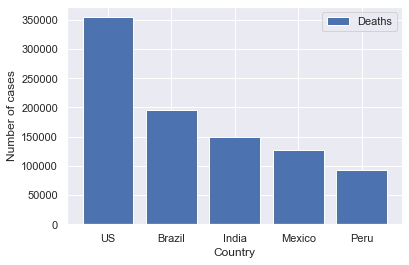

In [43]:
plt.xlabel('Country')
plt.ylabel('Number of cases')
plt.bar(c['Country_Region'], c['Deaths'],label='Deaths')
plt.legend()
plt.show()

In [44]:
# 16. Show the list of countries with non-zero Confirmed cases in which all the cases of Covid recovered, as shown below.

In [45]:
a[(a['Confirmed'] != 0) & (a['Recovered'] != 0)][a['Confirmed'] == a['Recovered']].set_index(pd.Index(range(3)))


,Country_Region,Confirmed,Deaths,Recovered,Fatality Percentage
0,Marshall Islands,4,0,4,0.0
1,Samoa,2,0,2,0.0
2,Vanuatu,1,0,1,0.0


In [46]:
a.plot(x=range(len(c['Country'])))

KeyError: 'Country'

In [47]:
# plt.style.available